You can order print and ebook versions of *Think Python 3e* from
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) and
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

In [8]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');
download('https://github.com/ramalho/jupyturtle/releases/download/2024-03/jupyturtle.py');

In [9]:
import thinkpython

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Functions and Interfaces

This chapter introduces a module called `jupyturtle`, which allows you to create simple drawings by giving instructions to an imaginary turtle.
We will use this module to write functions that draw squares, polygons, and circles -- and to demonstrate **interface design**, which is a way of designing functions that work together.

## The jupyturtle module

To use the `jupyturtle` module, we can import it like this.

In [10]:
import jupyturtle

Now we can use the functions defined in the module, like `make_turtle` and `forward`.

In [11]:
jupyturtle.make_turtle()
jupyturtle.forward(100)

`make_turtle` creates a **canvas**, which is a space on the screen where we can draw, and a turtle, which is represented by a circular shell and a triangular head.
The circle shows the location of the turtle and the triangle indicates the direction it is facing.

`forward` moves the turtle a given distance in the direction it's facing, drawing a line segment along the way.
The distance is in arbitrary units -- the actual size depends on your computer's screen.

We will use functions defined in the `jupyturtle` module many times, so it would be nice if we did not have to write the name of the module every time.
That's possible if we import the module like this.

In [12]:
from jupyturtle import make_turtle, forward

This version of the import statement imports `make_turtle` and `forward` from the `jupyturtle` module so we can call them like this.

In [13]:
make_turtle()
forward(100)

`jupyturtle` provides two other functions we'll use, called `left` and `right`.
We'll import them like this.

In [14]:
from jupyturtle import left, right

`left` causes the turtle to turn left. It takes one argument, which is the angle of the turn in degrees.
For example, we can make a 90 degree left turn like this.

In [15]:
make_turtle()
def make_square():
    for i in range(4):
        forward(50)
        left(90)
def make_triangle_clockwise():
    for i in range(3):
        forward(50)
        left(120)
def make_triangle_counterclockwise():
    for i in range(3):
        forward(50)
        right(120)
make_square()
forward(50)
make_triangle_clockwise()
left(180)
forward(50)
make_triangle_counterclockwise()

This program moves the turtle east and then north, leaving two line segments behind.
Before you go on, see if you can modify the previous program to make a square.

## Making a square

Here's one way to make a square.

In [16]:
make_turtle()

forward(50)
left(90)

forward(50)
left(90)

forward(50)
left(90)

forward(50)
left(90)

Because this program repeats the same pair of lines four times, we can do the same thing more concisely with a `for` loop.

In [17]:
make_turtle()
for i in range(4):
    forward(50)
    left(90)

## Encapsulation and generalization

Let's take the square-drawing code from the previous section and put it in a function called `square`.

In [18]:
def square():
    for i in range(4):
        forward(50)
        left(90)

Now we can call the function like this.

In [19]:
make_turtle()
square()

Wrapping a piece of code up in a function is called **encapsulation**.
One of the benefits of encapsulation is that it attaches a name to the code, which serves as a kind of documentation. Another advantage is that if you re-use the code, it is more concise to call a function twice than to copy and paste the body!

In the current version, the size of the square is always `50`.
If we want to draw squares with different sizes, we can take the length of the sides as a parameter.

In [20]:
def square(length):
    for i in range(4):
        forward(length)
        left(90)

Now we can draw squares with different sizes.

In [21]:
make_turtle()
square(30)
square(60)

Adding a parameter to a function is called **generalization** because it makes the function more general: with the previous version, the square is always the same size; with this version it can be any size.

If we add another parameter, we can make it even more general.
The following function draws regular polygons with a given number of sides.

In [22]:
def polygon(n, length):
    angle = 360 / n
    for i in range(n):
        forward(length)
        left(angle)

In a regular polygon with `n` sides, the angle between adjacent sides is `360 / n` degrees.

The following example draws a `7`-sided polygon with side length `30`.

In [23]:
make_turtle()
polygon(7, 30)

When a function has more than a few numeric arguments, it is easy to forget what they are, or what order they should be in.
It can be a good idea to include the names of the parameters in the argument list.

In [24]:
make_turtle()
polygon(n=7, length=30)

These are sometimes called "named arguments" because they include the parameter names.
But in Python they are more often called **keyword arguments** (not to be confused with Python keywords like `for` and `def`).

This use of the assignment operator, `=`, is a reminder about how arguments and parameters work -- when you call a function, the arguments are assigned to the parameters.

## Approximating a circle

Now suppose we want to draw a circle.
We can do that, approximately, by drawing a polygon with a large number of sides, so each side is small enough that it's hard to see.
Here is a function that uses `polygon` to draw a `30`-sided polygon that approximates a circle.

In [25]:
import math

def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

`circle` takes the radius of the the circle as a parameter.
It computes `circumference`, which is the circumference of a circle with the given radius.
`n` is the number of sides, so `circumference / n` is the length of each side.

This function might take a long time to run.
We can speed it up by calling `make_turtle` with a keyword argument called `delay` that sets the time, in seconds, the turtle waits after each step.
The default value is `0.2` seconds -- if we set it to `0.02` it runs about 10 times faster.

In [26]:
make_turtle(delay=0.02)
circle(30)

A limitation of this solution is that `n` is a constant, which means
that for very big circles, the sides are too long, and for small
circles, we waste time drawing very short sides.
One option is to generalize the function by taking `n` as a parameter.
But let's keep it simple for now.

## Refactoring

Now let's write a more general version of `circle`, called `arc`, that takes a second parameter, `angle`, and draws an arc of a circle that spans the given angle.
For example, if `angle` is `360` degrees, it draws a complete circle. If `angle` is `180` degrees, it draws a half circle.

To write `circle`, we were able to reuse `polygon`, because a many-sided polygon is a good approximation of a circle.
But we can't use `polygon` to write `arc`.

Instead, we'll create the more general version of `polygon`, called `polyline`.

In [27]:
def polyline(n, length, angle):
    for i in range(n):
        forward(length)
        left(angle)

`polyline` takes as parameters the number of line segments to draw, `n`, the length of the segments, `length`, and the angle between them, `angle`.

Now we can rewrite `polygon` to use `polyline`.

In [28]:
def polygon(n, length):
    angle = 360.0 / n
    polyline(n, length, angle)

And we can use `polyline` to write `arc`.

In [29]:
def arc(radius, angle):
    arc_length = 2 * math.pi * radius * angle / 360
    n = 30
    length = arc_length / n
    step_angle = angle / n
    polyline(n, length, step_angle)

`arc` is similar to `circle`, except that it computes `arc_length`, which is a fraction of the circumference of a circle.

Finally, we can rewrite `circle` to use `arc`.

In [30]:
def circle(radius):
    arc(radius,  360)

To check that these functions work as expected, we'll use them to draw something like a snail.
With `delay=0`, the turtle runs as fast as possible.

In [36]:
make_turtle(delay=0)
polygon(n=20, length=9)
arc(radius=70, angle=70)
circle(radius=10)

In this example, we started with working code and reorganized it with different functions.
Changes like this, which improve the code without changing its behavior, are called **refactoring**.

If we had planned ahead, we might have written `polyline` first and avoided refactoring, but often you don't know enough at the beginning of a project to design all the functions.
Once you start coding, you understand the problem better.
Sometimes refactoring is a sign that you have learned something.

## Stack diagram

When we call `circle`, it calls `arc`, which calls `polyline`.
We can use a stack diagram to show this sequence of function calls and the parameters for each one.

In [46]:
from diagram import make_binding, make_frame, Frame, Stack

frame1 = make_frame(dict(radius=10), name='circle', loc='left')

frame2 = make_frame(dict(radius=10, angle=360), name='arc', loc='left', dx=1.1)

frame3 = make_frame(dict(n=30, length=2.09, angle=12.0),
                    name='polyline', loc='left', dx=1.1, offsetx=-0.27)

stack = Stack([frame1, frame2, frame3], dy=-0.4)

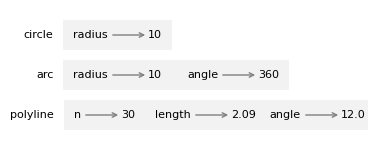

In [47]:
from diagram import diagram, adjust

width, height, x, y = [3.58, 1.31, 0.98, 1.06]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
#adjust(x, y, bbox)

In [54]:
def circle_stack(radius):
    angle = 360
    arc_length = 2 * math.pi * radius * angle / 360
    n = 30
    length = arc_length / n
    step_angle = angle / n
    print(f"  circle: radius -> {radius}")
    print(f"     arc: radius -> {radius}  angle -> {angle}")
    print(f"polyline:      n -> {n} length -> {round(length,2)} angle -> {step_angle}")
circle_stack(10)

  circle: radius -> 10
     arc: radius -> 10  angle -> 360
polyline:      n -> 30 length -> 2.09 angle -> 12.0


| function |              | parameters |      |
|---:      |---:          |---:        |---:      |
| circle:  |radius  $\rightarrow$ 10   |            | |
|     arc: | radius $\rightarrow$ 10   |angle  $\rightarrow$ 360|
|polyline: |     n  $\rightarrow$ 30   |length $\rightarrow$ 2.09 |angle $\rightarrow$ 12.0|




Notice that the value of `angle` in `polyline` is different from the value of `angle` in `arc`.
Parameters are local, which means you can use the same parameter name in different functions; it's a different variable in each function, and it can refer to a different value.

## A development plan

A **development plan** is a process for writing programs.
The process we used in this chapter is "encapsulation and generalization".
The steps of this process are:

1.  Start by writing a small program with no function definitions.

2.  Once you get the program working, identify a coherent piece of it,
    encapsulate the piece in a function and give it a name.

3.  Generalize the function by adding appropriate parameters.

4.  Repeat Steps 1 to 3 until you have a set of working functions.

5.  Look for opportunities to improve the program by refactoring. For
    example, if you have similar code in several places, consider
    factoring it into an appropriately general function.

This process has some drawbacks -- we will see alternatives later -- but it can be useful if you don't know ahead of time how to divide the program into functions.
This approach lets you design as you go along.

The design of a function has two parts:

* The **interface** is how the function is used, including its name, the parameters it takes and what the function is supposed to do.

* The **implementation** is how the function does what it's supposed to do.

For example, here's the first version of `circle` we wrote, which uses `polygon`.

In [ ]:
def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

And here's the refactored version that uses `arc`.

In [ ]:
def circle(radius):
    arc(radius,  360)

These two functions have the same interface -- they take the same parameters and do the same thing -- but they have different implementations.

## Docstrings

A **docstring** is a string at the beginning of a function that explains the interface ("doc" is short for "documentation").
Here is an example:

In [ ]:
def polyline(n, length, angle):
    """Draws line segments with the given length and angle between them.

    n: integer number of line segments
    length: length of the line segments
    angle: angle between segments (in degrees)
    """
    for i in range(n):
        forward(length)
        left(angle)

By convention, docstrings are triple-quoted strings, also known as **multiline strings** because the triple quotes allow the string to span more than one line.

A docstring should:

* Explain concisely what the function does, without getting into the details of how it works,

* Explain what effect each parameter has on the behavior of the function, and

* Indicate what type each parameter should be, if it is not obvious.

Writing this kind of documentation is an important part of interface design.
A well-designed interface should be simple to explain; if you have a hard time explaining one of your functions, maybe the interface could be improved.

## Debugging

An interface is like a contract between a function and a caller. The
caller agrees to provide certain arguments and the function agrees to
do certain work.

For example, `polyline` requires three arguments: `n` has to be an integer; `length` should be a positive number; and `angle` has to be a number, which is understood to be in degrees.

These requirements are called **preconditions** because they are supposed to be true before the function starts executing. Conversely, conditions at the end of the function are **postconditions**.
Postconditions include the intended effect of the function (like drawing line segments) and any side effects (like moving the turtle or making other changes).

Preconditions are the responsibility of the caller. If the caller violates a precondition and the function doesn't work correctly, the bug is in the caller, not the function.

If the preconditions are satisfied and the postconditions are not, the bug is in the function. If your pre- and postconditions are clear, they can help with debugging.

## Glossary

**interface design:**
A process for designing the interface of a function, which includes the parameters it should take.

**canvas:**
A window used to display graphical elements including lines, circles, rectangles, and other shapes.

**encapsulation:**
 The process of transforming a sequence of statements into a function definition.

**generalization:**
 The process of replacing something unnecessarily specific (like a number) with something appropriately general (like a variable or parameter).

**keyword argument:**
An argument that includes the name of the parameter.

**refactoring:**
 The process of modifying a working program to improve function interfaces and other qualities of the code.

**development plan:**
A process for writing programs.

**docstring:**
 A string that appears at the top of a function definition to document the function's interface.

**multiline string:**
A string enclosed in triple quotes that can span more than one line of a program.

**precondition:**
 A requirement that should be satisfied by the caller before a function starts.

**postcondition:**
 A requirement that should be satisfied by the function before it ends.

## Exercises

In [ ]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

For the exercises below, there are a few more turtle functions you might want to use.

* `penup` lifts the turtle's imaginary pen so it doesn't leave a trail when it moves.

* `pendown` puts the pen back down.

The following function uses `penup` and `pendown` to move the turtle without leaving a trail.

In [ ]:
from jupyturtle import penup, pendown

def jump(length):
    """Move forward length units without leaving a trail.

    Postcondition: Leaves the pen down.
    """
    penup()
    forward(length)
    pendown()

### Exercise

Write a function called `rectangle` that draws a rectangle with given side lengths.
For example, here's a rectangle that's `80` units wide and `40` units tall.

In [ ]:
# Solution goes here

You can use the following code to test your function.

In [ ]:
make_turtle()
rectangle(80, 40)

### Exercise

Write a function called `rhombus` that draws a rhombus with a given side length and a given interior angle. For example, here's a rhombus with side length `50` and an interior angle of `60` degrees.

In [ ]:
# Solution goes here

You can use the following code to test your function.

In [ ]:
make_turtle()
rhombus(50, 60)

### Exercise

Now write a more general function called `parallelogram` that draws a quadrilateral with parallel sides. Then rewrite `rectangle` and `rhombus` to use `parallelogram`.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

You can use the following code to test your functions.

In [ ]:
make_turtle(width=400)
jump(-120)

rectangle(80, 40)
jump(100)
rhombus(50, 60)
jump(80)
parallelogram(80, 50, 60)

### Exercise

Write an appropriately general set of functions that can draw shapes like this.

![](https://github.com/AllenDowney/ThinkPython/raw/v3/jupyturtle_pie.png)

Hint: Write a function called `triangle` that draws one triangular segment, and then a function called `draw_pie` that uses `triangle`.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

You can use the following code to test your functions.

In [ ]:
turtle = make_turtle(delay=0)
jump(-80)

size = 40
draw_pie(5, size)
jump(2*size)
draw_pie(6, size)
jump(2*size)
draw_pie(7, size)

In [ ]:
# Solution goes here

### Exercise

Write an appropriately general set of functions that can draw flowers like this.

![](https://github.com/AllenDowney/ThinkPython/raw/v3/jupyturtle_flower.png)

Hint: Use `arc` to write a function called `petal` that draws one flower petal.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

You can use the following code to test your functions.

Because the solution draws a lot of small line segments, it tends to slow down as it runs.
To avoid that, you can add the keyword argument `auto_render=False` to avoid drawing after every step, and then call the `render` function at the end to show the result.

While you are debugging, you might want to remove `auto_render=False`.

In [ ]:
from jupyturtle import render

turtle = make_turtle(auto_render=False)

jump(-60)
n = 7
radius = 60
angle = 60
flower(n, radius, angle)

jump(120)
n = 9
radius = 40
angle = 85
flower(n, radius, angle)

render()

In [ ]:
# Solution goes here

### Ask a virtual assistant

There are several modules like `jupyturtle` in Python, and the one we used in this chapter has been customized for this book.
So if you ask a virtual assistant for help, it won't know which module to use.
But if you give it a few examples to work with, it can probably figure it out.
For example, try this prompt and see if it can write a function that draws a spiral:

```
The following program uses a turtle graphics module to draw a circle:

from jupyturtle import make_turtle, forward, left
import math

def polygon(n, length):
    angle = 360 / n
    for i in range(n):
        forward(length)
        left(angle)
        
def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)
    
make_turtle(delay=0)
circle(30)

Write a function that draws a spiral.
```

Keep in mind that the result might use features we have not seen yet, and it might have errors.
Copy the code from the VA and see if you can get it working.
If you didn't get what you wanted, try modifying the prompt.


In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)